# Análise exploratória de dados quantitativos

In [57]:
# Importanto as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# estabelecendo o caminho onde o dataset está armazenado
caminho = '../data/raw/archive/xAPI-Edu-Data.csv'

# especificando as colunas de interesse para este estudo
coluna = ['raisedhands', 'Class']

In [50]:
# lendo o arquivo csv somente com a coluna 'raisedhands'
df = pd.read_csv(caminho, usecols=coluna)

# exibindo os cincos primeiros registros da tabela
df.head(5)

,raisedhands,Class
0,15,M
1,20,M
2,10,L
3,30,L
4,40,M


In [51]:
# exibindo algunas informações sobre o nosso conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raisedhands  480 non-null    int64 
 1   Class        480 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.6+ KB


In [52]:
# Definir o número desejado de classes
num_classes = 5

# Criar intervalos de classe usando pd.cut()
intervalos = pd.cut(df['raisedhands'], bins=num_classes, precision=0)

# Calcular a frequência absoluta
frequencia_absoluta = intervalos.value_counts().sort_index()

# Calcular a frequência relativa
frequencia_relativa = intervalos.value_counts(normalize=True).sort_index()

# Criar a tabela de distribuição de frequência
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': frequencia_absoluta,
    'Frequência Relativa': frequencia_relativa
})

# Visualizando a tabela
tabela_frequencia

,Frequência Absoluta,Frequência Relativa
raisedhands,,
"(-0.0, 20.0]",151,0.314583
"(20.0, 40.0]",74,0.154167
"(40.0, 60.0]",57,0.118750
"(60.0, 80.0]",127,0.264583
"(80.0, 100.0]",71,0.147917


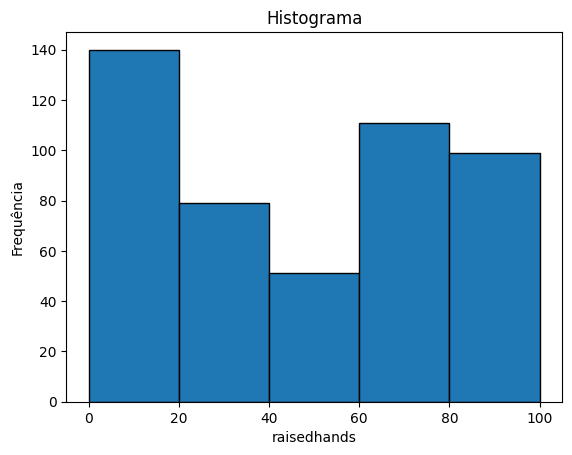

In [53]:
# Criar um histograma para visualizar a distribuição
plt.hist(df['raisedhands'], bins=num_classes, edgecolor='black')
plt.title('Histograma')
plt.xlabel('raisedhands')
plt.ylabel('Frequência')
plt.show()

In [55]:
#exibindo medidas de tendência central
df.describe()

,raisedhands
count,480.000000
mean,46.775000
std,30.779223
min,0.000000
25%,15.750000
50%,50.000000
75%,75.000000
max,100.000000


Text(0.5, 1.0, 'Relação entre a participação do aluno e seu desempenho')

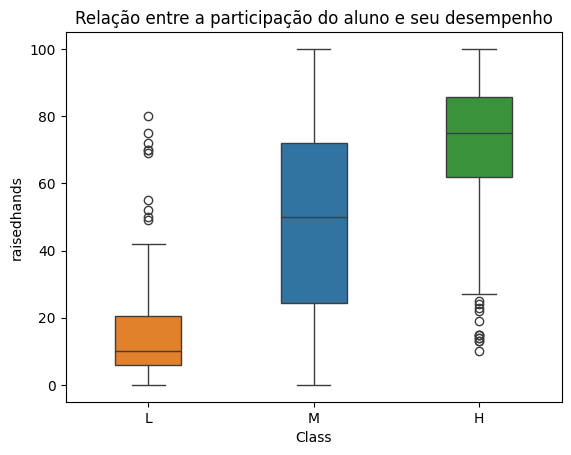

In [58]:
# fazendo uma relação do nível do aluno com a quantidade de vezes que ele levantou a mão na sala de aula
sns.boxplot( x = 'Class',
             y = 'raisedhands',
             data = df,
             hue="Class",
             fill=True,
             gap=0.5,
             order=['L', 'M', 'H']
)

plt.title("Relação entre a participação do aluno e seu desempenho")